In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import pickle
import os

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
print("Tensorlfow version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tensorlfow version:  2.12.0
Eager mode:  True
GPU is available


In [ ]:
# reading the training CSV file
DATA_DIR  = "./drive/MyDrive/vulnerability_dataset"
data = pd.read_csv(os.path.join(DATA_DIR,'vulnerability_train.csv'))
# displaying the contents of the CSV file


In [ ]:
data.head()

,source_code,CWE114,CWE134,CWE190,CWE196,CWE319,CWE369,CWE398,CWE416,CWE427,CWE469,CWE506,CWE605,CWE606,CWE666,CWE680,CWE761,CWE789
0,"char * data ;\nchar dataBuffer [ 250 ] = ""PATH...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,void CWE369_Divide_by_Zero__int_listen_socket_...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,void CWE369_Divide_by_Zero__int_listen_socket_...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,void CWE369_Divide_by_Zero__int_listen_socket_...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
columns = data.columns
print(columns)
#data= data.replace({'CWE-119':{'FALSE': False, 'TRUE':True}})

Index(['source_code', 'CWE114', 'CWE134', 'CWE190', 'CWE196', 'CWE319',
       'CWE369', 'CWE398', 'CWE416', 'CWE427', 'CWE469', 'CWE506', 'CWE605',
       'CWE606', 'CWE666', 'CWE680', 'CWE761', 'CWE789'],
      dtype='object')


data_cropped = data.loc[:,['CWE-119', ' CWE-120', 'CWE-469', 'CWE-476', 'CWE-other','functionSource']]

#data_cropped.head(10)
columns = list(data_cropped.columns)
data_cropped = data_cropped.replace({True:"TRUE",False:"FALSE"})
for column in columns[:-1]:
    data_cropped[column] = data_cropped[column].map(str.upper)

In [ ]:
data=data.sample(frac=1)

In [ ]:
data.head()

,source_code,CWE114,CWE134,CWE190,CWE196,CWE319,CWE369,CWE398,CWE416,CWE427,CWE469,CWE506,CWE605,CWE606,CWE666,CWE680,CWE761,CWE789
4547,void CWE134_Uncontrolled_Format_String__char_l...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1765,int ffio_rewind_with_probe_data(AVIOContext *s...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2621,"char *dfaexec(struct dfa *d,const char *begin,...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16510,void bad()\nchar * data ;\nchar dataBuffer [ 1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17687,static void CVE_2013_0864_VULN_gif_copy_img_re...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data=data.dropna()

In [ ]:
myrand=71926
np.random.seed(myrand)
tf.random.set_seed(myrand)
print("Random seed is:",myrand)

Random seed is: 71926


In [ ]:
### Set the global value
WORDS_SIZE=10000
INPUT_SIZE=500
NUM_CLASSES=2
MODEL_NUM=0
EPOCHS=10

In [ ]:
data['source_code'] = data['source_code'].astype(str)

In [ ]:
X=data['source_code']
y=np.array([data['CWE114'].values,data['CWE134'].values,data['CWE190'].values,data['CWE196'].values,data['CWE319'].values,data['CWE369'].values,data['CWE398'].values,data['CWE416'].values,data['CWE427'].values,data['CWE469'].values,data['CWE506'].values,data['CWE605'].values,data['CWE606'].values,data['CWE666'].values,data['CWE680'].values,data['CWE761'].values,data['CWE789'].values])

In [ ]:
X.shape

(17724,)

In [ ]:
y.shape

(17724, 17)

In [ ]:
y = y.T

In [ ]:
data.to_pickle("vulnerability_train.pickle")

In [ ]:
data=pd.read_pickle("vulnerability_train.pickle")

In [ ]:
x_all = data['source_code']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (17724,)
Shape of y: (17724, 17)


In [ ]:
data.columns[1:]

Index(['CWE114', 'CWE134', 'CWE190', 'CWE196', 'CWE319', 'CWE369', 'CWE398',
       'CWE416', 'CWE427', 'CWE469', 'CWE506', 'CWE605', 'CWE606', 'CWE666',
       'CWE680', 'CWE761', 'CWE789'],
      dtype='object')

In [ ]:
y_train=[]
#print(data.iloc[:,2])
data = data.ffill()
columns = data.columns[1:]
for column in columns:
    y_train.append(tf.keras.utils.to_categorical(list(data[column].values), num_classes=NUM_CLASSES).astype(np.int64))
y_train = np.array(y_train)

In [ ]:
y_train.shape

(17, 17724, 2)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False)
tokenizer.fit_on_texts(list(x_all))
tokenizer.num_words = WORDS_SIZE

In [ ]:
# data['functionSource'] =  [x.decode('utf-8') for x in data['functionSource'] ]
list_tokenized_train = tokenizer.texts_to_sequences(X)
X = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_train, 
                                  maxlen=INPUT_SIZE,
                                  padding='post')
X = X.astype(np.int64)

In [ ]:
X

array([[  31,    8,  338, ...,    0,    0,    0],
       [  31,  465, 2620, ...,    0,    0,    0],
       [  11,  227,  115, ...,    0,    0,    0],
       ...,
       [  11,  227,  115, ...,    0,    0,    0],
       [   5,   85, 2382, ...,    0,    0,    0],
       [  31,   11, 1576, ...,    0,    0,    0]], dtype=int64)

In [ ]:
import pickle

#saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer= pickle.load(handle)

In [ ]:
#  Create a random weights matrix
random_weights = np.random.normal(size=(WORDS_SIZE, 13),scale=0.01)

In [ ]:
random_weights

array([[ 0.0060252 , -0.00302141, -0.00566813, ..., -0.00071736,
         0.00656931, -0.0077152 ],
       [-0.0026452 ,  0.00101939,  0.00791392, ...,  0.00173955,
         0.00785835,  0.00549122],
       [-0.0044089 ,  0.01024976,  0.01351175, ...,  0.01517417,
        -0.00523813,  0.00256636],
       ...,
       [ 0.0093493 ,  0.0005328 ,  0.00262669, ..., -0.002587  ,
         0.01392652,  0.00944651],
       [-0.00716167,  0.00386448, -0.00194482, ...,  0.00670759,
         0.01145522,  0.00023146],
       [-0.00617482, -0.0155774 ,  0.00127028, ..., -0.00057702,
        -0.00268833, -0.00591792]])

In [ ]:
inp_layer = tf.keras.layers.Input(shape=(INPUT_SIZE,))
mid_layers = tf.keras.layers.Embedding(input_dim = WORDS_SIZE,
                                    output_dim = 13,
                                    weights=[random_weights],
                                    input_length = INPUT_SIZE)(inp_layer)
mid_layers = tf.keras.layers.Convolution1D(filters=512, kernel_size=(9), padding='same', activation='relu')(mid_layers)
mid_layers = tf.keras.layers.MaxPool1D(pool_size=5)(mid_layers)
mid_layers = tf.keras.layers.Dropout(0.5)(mid_layers)
mid_layers = tf.keras.layers.Flatten()(mid_layers)
mid_layers = tf.keras.layers.Dense(128, activation='relu')(mid_layers)
mid_layers = tf.keras.layers.Dense(64, activation='relu')(mid_layers)
output1 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output2 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output3 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output4 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output5 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output6 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output7 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output8 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output9 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output10 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output11 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output12 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output13 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output14 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output15 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output16 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output17 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
model = tf.keras.Model(inp_layer,[output1,output2,output3,output4,output5,output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])

# Define custom optimizers
# adam = tf.keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1, decay=0.0, amsgrad=False)

## Compile model with metrics
model.compile(optimizer="ADAM", loss='categorical_crossentropy', metrics=['accuracy'])
print("CNN model built: ")
model.summary()

CNN model built: 
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 13)      130000      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 500, 512)     60416       ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 100, 512)     0           ['conv1d[0][0]']                 
                                                                            

In [ ]:
y_train.shape

(17, 17724, 2)

In [ ]:
y_train

array([[[1, 0],
        [0, 1],
        [1, 0],
        ...,
        [1, 0],
        [0, 1],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       ...,

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [0, 1],
        ...,
        [0, 1],
        [1, 0],
        [1, 0]]], dtype=int64)

Epoch 1/40
139/139 - 5s - loss: 0.6489 - dense_2_loss: 0.1830 - dense_3_loss: 0.1580 - dense_4_loss: 0.0098 - dense_5_loss: 2.3015e-05 - dense_6_loss: 0.0134 - dense_7_loss: 0.0096 - dense_8_loss: 6.7957e-06 - dense_9_loss: 3.2895e-04 - dense_10_loss: 0.0054 - dense_11_loss: 0.0013 - dense_12_loss: 3.1046e-04 - dense_13_loss: 0.0013 - dense_14_loss: 0.0268 - dense_15_loss: 0.0023 - dense_16_loss: 0.0265 - dense_17_loss: 0.1870 - dense_18_loss: 0.0239 - dense_2_accuracy: 0.9049 - dense_3_accuracy: 0.9218 - dense_4_accuracy: 0.9964 - dense_5_accuracy: 1.0000 - dense_6_accuracy: 0.9950 - dense_7_accuracy: 0.9963 - dense_8_accuracy: 1.0000 - dense_9_accuracy: 0.9998 - dense_10_accuracy: 0.9980 - dense_11_accuracy: 0.9997 - dense_12_accuracy: 0.9999 - dense_13_accuracy: 0.9996 - dense_14_accuracy: 0.9899 - dense_15_accuracy: 0.9993 - dense_16_accuracy: 0.9867 - dense_17_accuracy: 0.8967 - dense_18_accuracy: 0.9911 - 5s/epoch - 34ms/step
Epoch 2/40
139/139 - 5s - loss: 0.6418 - dense_2_loss:

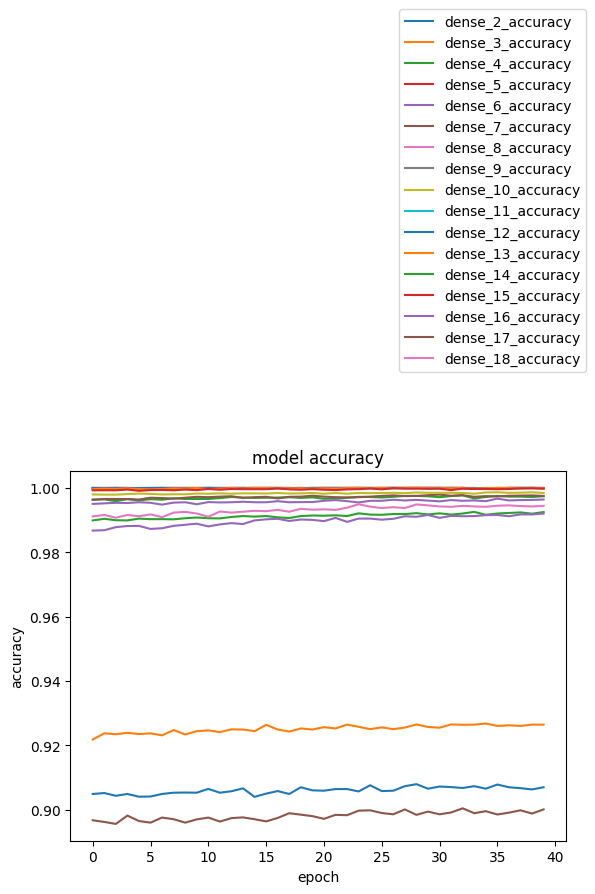

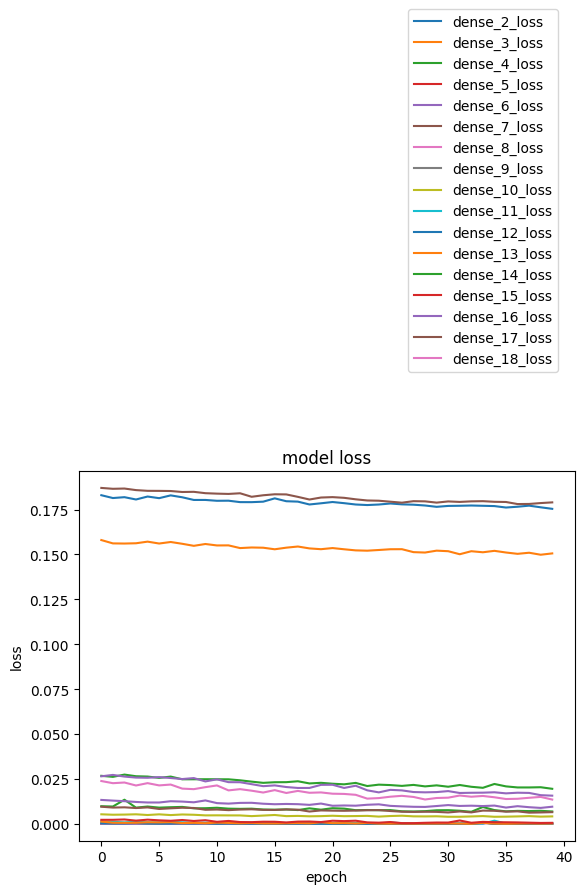

In [ ]:
class_weights = [{0: 1., 1: 5.},{0: 1., 1: 5.},{0: 1., 1: 5.},{0: 1., 1: 5.},{0: 1., 1: 5.}]

history = model.fit(x = X,
          y = [y_train[0],y_train[1],y_train[2],y_train[3],y_train[4],y_train[5],y_train[6],y_train[7],y_train[8],y_train[9],y_train[10],y_train[11],y_train[12],y_train[13],y_train[14],y_train[15],y_train[16]],
          epochs = 0,
          batch_size = 128,
          verbose =2)

print(history.history.keys())
# summarize history for accuracy

accuracy_labels = ["dense_"+str(i)+"_accuracy" for i in range(2,19) ]
loss_labels = ["dense_" + str(i) + "_loss" for i in range(2,19)]
# summarize history for accuracy

for i in range(17):
  plt.plot(history.history[accuracy_labels[i]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(accuracy_labels,bbox_to_anchor =(0.65, 1.25))
plt.show()
# summarize history for loss
for i in range(17):
  plt.plot(history.history[loss_labels[i]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loss_labels,bbox_to_anchor =(0.65, 1.25))
plt.show()

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('vulnerability_test.csv')


In [ ]:
data.head()

,source_code,CWE114,CWE134,CWE190,CWE196,CWE319,CWE369,CWE398,CWE416,CWE427,CWE469,CWE506,CWE605,CWE606,CWE666,CWE680,CWE761,CWE789
3009,"static void mem_add(MemoryListener *listener, ...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3978,"static\nset_rx_control(E1000State *s, int inde...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
141,static void CVE_2013_1576_VULN_dissect_sdp_med...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3645,"static void rtl8139_io_writel(void *opaque, ui...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2115,static inline void xhci_dma_write_u32s(XHCISta...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
data=data.sample(frac=1)

In [ ]:
X=data['source_code']
y=np.array([data['CWE114'].values,data['CWE134'].values,data['CWE190'].values,data['CWE196'].values,data['CWE319'].values,data['CWE369'].values,data['CWE398'].values,data['CWE416'].values,data['CWE427'].values,data['CWE469'].values,data['CWE506'].values,data['CWE605'].values,data['CWE606'].values,data['CWE666'].values,data['CWE680'].values,data['CWE761'].values,data['CWE789'].values])

In [ ]:
y = y.T

In [ ]:
y_test=[]
#print(data.iloc[:,2])
data = data.ffill()
columns = data.columns[1:]
for column in columns:
    y_test.append(tf.keras.utils.to_categorical(list(data[column].values), num_classes=NUM_CLASSES).astype(np.int64))
y_test = np.array(y_train)

In [ ]:
y_test

array([[[1, 0],
        [0, 1],
        [1, 0],
        ...,
        [1, 0],
        [0, 1],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       ...,

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [0, 1],
        ...,
        [0, 1],
        [1, 0],
        [1, 0]]], dtype=int64)

In [ ]:
# data['functionSource'] =  [x.decode('utf-8') for x in data['functionSource'] ]
list_tokenized_test = tokenizer.texts_to_sequences(X)
x_test = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_test, 
                                  maxlen=INPUT_SIZE,
                                  padding='post')
x_test = x_test.astype(np.int64)

In [ ]:
x_test

array([[  31,   11,  177, ...,    0,    0,    0],
       [  31,  245,  781, ...,    0,    0,    0],
       [  31,   11,  338, ...,    0,    0,    0],
       ...,
       [  31,  246,  285, ...,    0,    0,    0],
       [  31,   11, 2185, ...,    0,    0,    0],
       [  31,    8,  338, ...,    0,    0,    0]], dtype=int64)

In [ ]:
y_test

array([[[1, 0],
        [0, 1],
        [1, 0],
        ...,
        [1, 0],
        [0, 1],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       ...,

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [1, 0],
        [1, 0],
        [1, 0]],

       [[1, 0],
        [1, 0],
        [0, 1],
        ...,
        [0, 1],
        [1, 0],
        [1, 0]]], dtype=int64)

In [ ]:
# Load model
model = tf.keras.models.load_model("svd_1.hdf5")

In [ ]:
results = model.evaluate(x_test, y_test = [y_test[0],y_test[1],y_test[2],y_test[3],y_test[4]], batch_size=128)
for num in range(0,len(model.metrics_names)):
    print(model.metrics_names[num]+': '+str(results[num]))

TypeError: Invalid keyword arguments: ['y_test']

In [ ]:
predicted = model.predict(x_test)

261/261 [==============================] - 5s 13ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test[0]

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
data_test

,CWE-119,CWE-120,CWE-469,CWE-476,CWE-other,functionSource
6185,1,1,0,0,0,"b'_compare_ints(_cs_io_t *inp1,\n ..."
5506,0,0,0,0,1,"b'fits_write_header(const qfits_header* hdr, c..."
1201,0,1,0,0,0,b'server_unlink (rpcsvc_request_t *req)\n{\n ...
3064,1,1,0,0,0,"b""hexdump(unsigned char *s, unsigned long l)\n..."
1077,0,0,0,0,1,b'GLESendSocket(const string& commands) {\n#if...
...,...,...,...,...,...,...
1727,0,0,0,1,0,b'qpol_constraint_get_perm_iter(const qpol_pol...
5756,0,1,0,0,1,"b'main(int argc, char ** argv)\n{\n dxml_elem..."
5697,0,1,0,0,0,"b""cob_move_alphanum_to_alphanum (cob_field *f1..."
8159,1,1,0,0,0,"b'git_path_find_dir(git_buf *dir, const char *..."


In [ ]:
model.evaluate(x_test,y = [y_test[0],y_test[1],y_test[2],y_test[3],y_test[4]])

261/261 [==============================] - 4s 13ms/step - loss: 4.6806 - dense_2_loss: 0.9708 - dense_3_loss: 1.2906 - dense_4_loss: 0.3931 - dense_5_loss: 0.7554 - dense_6_loss: 1.2708 - dense_2_accuracy: 0.8765 - dense_3_accuracy: 0.8425 - dense_4_accuracy: 0.9637 - dense_5_accuracy: 0.9136 - dense_6_accuracy: 0.8128


[4.680647850036621,
 0.9707695245742798,
 1.2905772924423218,
 0.39306971430778503,
 0.7554128766059875,
 1.270817756652832,
 0.876471996307373,
 0.8424657583236694,
 0.9637106657028198,
 0.9136024713516235,
 0.8127853870391846]

In [ ]:
model.save('vuldet.h5')

In [ ]:
model = tf.keras.models.load_model("vuldet")

In [ ]:

for col in range(1,6):
    print('\nThis is evaluation for column',col)
    confusion = sklearn.metrics.confusion_matrix(y_train=test.iloc[:,col].to_numpy(), y_pred=predicted[col-1])
    print(confusion)
    tn, fp, fn, tp = confusion.ravel()
    print('\nTP:',tp)
    print('FP:',fp)
    print('TN:',tn)
    print('FN:',fn)

    ## Performance measure
#     print('\nAccuracy: '+ str(sklearn.metrics.accuracy_score(y_true=test.iloc[:,col].to_numpy(), y_pred=pred_test[col-1])))
#     print('Precision: '+ str(sklearn.metrics.precision_score(y_true=test.iloc[:,col].to_numpy(), y_pred=pred_test[col-1])))
#     print('Recall: '+ str(sklearn.metrics.recall_score(y_true=test.iloc[:,col].to_numpy(), y_pred=pred_test[col-1])))
#     print('F-measure: '+ str(sklearn.metrics.f1_score(y_true=test.iloc[:,col].to_numpy(), y_pred=pred_test[col-1])))
#     print('Precision-Recall AUC: '+ str(sklearn.metrics.average_precision_score(y_true=test.iloc[:,col].to_numpy(), y_score=predicted[col-1][:,1])))
#     print('AUC: '+ str(sklearn.metrics.roc_auc_score(y_true=test.iloc[:,col].to_numpy(), y_score=predicted[col-1][:,1])))
#     print('MCC: '+ str(sklearn.metrics.matthews_corrcoef(y_true=test.iloc[:,col].to_numpy(), y_pred=pred_test[col-1])))


This is evaluation for column 1


NameError: name 'test' is not defined